In [78]:
import numpy as np # linear algebra
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [79]:
vote=pd.read_csv('LS_2.0.csv')
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [6]:
# Replace NaN values with 0 in the entire DataFrame
vote.fillna(0, inplace=True)


In [7]:
# Check the basic information and missing data
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2263 non-null   object 
 6   GENDER                                    2263 non-null   object 
 7   CRIMINAL
CASES                            2263 non-null   object 
 8   AGE                                       2263 non-null   float64
 9   CATEGORY                                  2263 non-null   object 
 10  EDUCATION                           

#Numpy

In [62]:
print("What is the average age of the candidates?")

average_age = np.mean(vote['AGE'])
print("Average Age:", average_age)

What is the average age of the candidates?
Average Age: 46.61422889969067


In [70]:
print("Which party has the maximum number of winners?")

# Check if there are any winners before calculating the maximum
if (vote['WINNER'] == '1').any():
    party_winners = vote[vote['WINNER'] == '1']['PARTY'].value_counts()
    max_party_winners = party_winners.idxmax()
    print("Party with maximum winners:", max_party_winners)
else:
    print("There are no winners in the dataset.")

Which party has the maximum number of winners?
There are no winners in the dataset.


In [12]:
print(" What is the total number of votes cast across all constituencies?")

total_votes = np.sum(vote ['TOTAL\nVOTES'])
print("Total Votes Cast:", total_votes)

 What is the total number of votes cast across all constituencies?
Total Votes Cast: 594240703


In [71]:
print("What percentage of the total votes were postal votes?")

postal_votes_percentage = (np.sum(vote['POSTAL\nVOTES']) / np.sum(vote['TOTAL\nVOTES'])) * 100
print("Percentage of Postal Votes:", postal_votes_percentage)

What percentage of the total votes were postal votes?
Percentage of Postal Votes: 0.37728448904315465


In [74]:
print("What is the average number of criminal cases filed by the winners?")

winner_criminal_cases = vote[vote['WINNER'] == '1']['CRIMINAL\nCASES']
average_criminal_cases = np.mean(winner_criminal_cases)
print("Average Criminal Cases for Winners:", average_criminal_cases)

What is the average number of criminal cases filed by the winners?
Average Criminal Cases for Winners: nan


In [75]:
print("What is the distribution of candidates based on gender?")

gender_distribution = vote['GENDER'].value_counts()
print("Gender Distribution:\n", gender_distribution)

What is the distribution of candidates based on gender?
Gender Distribution:
 GENDER
MALE      1760
FEMALE     258
0          245
Name: count, dtype: int64


In [76]:
print("What is the average number of assets declared by the candidates?")

average_assets = np.mean(vote['ASSETS'])
print("Average Assets:", average_assets)

What is the average number of assets declared by the candidates?
Average Assets: 0.0


In [77]:
print("What is the average number of assets declared by the candidates?")

# Convert 'ASSETS' column to numeric, handling errors
vote['ASSETS'] = pd.to_numeric(vote['ASSETS'], errors='coerce')

# Calculate average assets, ignoring NaN values
average_assets = np.nanmean(vote['ASSETS'])
print("Average Assets:", average_assets)

What is the average number of assets declared by the candidates?
Average Assets: 0.0


In [26]:
print("Which constituency had the highest total votes?")

highest_votes_constituency = vote.loc[vote['TOTAL\nVOTES'].idxmax()]['CONSTITUENCY']
print("Constituency with the highest total votes:", highest_votes_constituency)

Which constituency had the highest total votes?
Constituency with the highest total votes: INDORE


In [28]:
print("What percentage of the electors voted in each constituency?")

vote['Voter Turnout Percentage'] = (vote['TOTAL\nVOTES'] / vote['TOTAL ELECTORS']) * 100
print(vote[['CONSTITUENCY', 'Voter Turnout Percentage']])

What percentage of the electors voted in each constituency?
         CONSTITUENCY  Voter Turnout Percentage
0            ADILABAD                 25.330684
1            ADILABAD                 21.399929
2            ADILABAD                 21.092771
3            ADILABAD                  0.875023
4                AGRA                 33.383823
...               ...                       ...
2258  YAVATMAL-WASHIM                  0.766419
2259        ZAHIRABAD                 28.975369
2260        ZAHIRABAD                 28.559732
2261        ZAHIRABAD                  9.271379
2262        ZAHIRABAD                  0.743328

[2263 rows x 2 columns]


In [31]:
print("What is the average liabilities of candidates in each party?")

# Clean the 'LIABILITIES' column to extract numeric values
vote['LIABILITIES'] = vote['LIABILITIES'].str.replace('Rs', '', regex=False) \
                                     .str.replace(',', '', regex=False) \
                                     .str.replace('~', '', regex=False) \
                                     .str.replace('+', '', regex=False) \
                                     .str.replace(' ', '', regex=False) \
                                     .str.replace('Thou', '000', regex=False)
# Convert the cleaned column to numeric
vote['LIABILITIES'] = pd.to_numeric(vote['LIABILITIES'], errors='coerce')

# Now calculate the average liabilities by party
average_liabilities_by_party = vote.groupby('PARTY')['LIABILITIES'].mean()
print("Average Liabilities by Party:\n", average_liabilities_by_party)

What is the average liabilities of candidates in each party?
Average Liabilities by Party:
 PARTY
AAM      0.0
AAP      0.0
ABGP     NaN
ABSKP    0.0
ADAL     NaN
        ... 
WAP      0.0
WPOI     0.0
YKP      NaN
YSRCP    0.0
ravp     NaN
Name: LIABILITIES, Length: 133, dtype: float64


In [33]:
print("What is the correlation between assets and liabilities for the candidates?")

correlation_assets_liabilities = np.corrcoef(vote['ASSETS'], vote['LIABILITIES'])[0, 1]
print("Correlation between Assets and Liabilities:", correlation_assets_liabilities)

What is the correlation between assets and liabilities for the candidates?
Correlation between Assets and Liabilities: nan


In [34]:
print("Which state had the highest number of criminal cases filed by its candidates?")

criminal_cases_by_state = vote.groupby('STATE')['CRIMINAL\nCASES'].sum()
state_with_highest_criminal_cases = criminal_cases_by_state.idxmax()
print("State with highest criminal cases:", state_with_highest_criminal_cases)

Which state had the highest number of criminal cases filed by its candidates?
State with highest criminal cases: West Bengal


In [36]:
print("How many candidates had no criminal cases?")

no_criminal_cases_count = len(vote[vote['CRIMINAL\nCASES'] == 0])
print("Number of candidates with no criminal cases:", no_criminal_cases_count)

How many candidates had no criminal cases?
Number of candidates with no criminal cases: 0


In [37]:
print("What is the average number of votes received by candidates across all constituencies?")

average_votes = np.mean(['TOTAL\nVOTES'])
print("Average Votes per Candidate:", average_votes)

What is the average number of votes received by candidates across all constituencies?
Average Votes per Candidate: 262589.79363676533


In [40]:
print("What is the median age of the winners?")

# Remove rows where 'AGE' or 'WINNER' is NaN
winners_age = vote[vote['WINNER'] == 'Yes']['AGE'].dropna()

# Calculate the median
median_age_winners = np.median(winners_age)

print("Median Age of Winners:", median_age_winners)


What is the median age of the winners?
Median Age of Winners: nan


In [41]:
print("What is the mode of the CATEGORY column?")

mode_category = vote['CATEGORY'].mode()[0]
print("Mode of CATEGORY column:", mode_category)

What is the mode of the CATEGORY column?
Mode of CATEGORY column: GENERAL


In [42]:
print("What is the average number of total electors in each constituency?")

average_electors_by_constituency = np.mean(vote['TOTAL ELECTORS'])
print("Average Total Electors per Constituency:", average_electors_by_constituency)

What is the average number of total electors in each constituency?
Average Total Electors per Constituency: 1658015.9465311533


In [44]:
print("What is the party with the highest number of criminal cases among its candidates?")

# Ensure 'CRIMINAL\nCASES' is numeric
vote['CRIMINAL\nCASES'] = pd.to_numeric(vote['CRIMINAL\nCASES'], errors='coerce')

criminal_cases_by_party = vote.groupby('PARTY')['CRIMINAL\nCASES'].sum()
party_with_highest_criminal_cases = criminal_cases_by_party.idxmax()
print("Party with highest criminal cases:", party_with_highest_criminal_cases)

What is the party with the highest number of criminal cases among its candidates?
Party with highest criminal cases: BJP


In [45]:
print("How many constituencies have over 80% voter turnout?")

high_turnout_constituencies = len(vote[vote['OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'] > 0.8])
print("Number of constituencies with over 80% voter turnout:", high_turnout_constituencies)

How many constituencies have over 80% voter turnout?
Number of constituencies with over 80% voter turnout: 2263


In [47]:
print("What is the average number of votes per candidate in each party?")

average_votes_by_party = vote.groupby('PARTY')['TOTAL\nVOTES'].mean()
print("Average Votes per Candidate in Each Party:\n", average_votes_by_party)

What is the average number of votes per candidate in each party?
Average Votes per Candidate in Each Party:
 PARTY
AAM       12430.50
AAP      106072.44
ABGP      35968.00
ABSKP      9912.00
ADAL     519739.00
           ...    
WAP       29392.00
WPOI      21302.00
YKP       15843.00
YSRCP    621480.24
ravp       9109.00
Name: TOTAL\nVOTES, Length: 133, dtype: float64


In [53]:
print("Which state has the highest average assets declared by candidates?")

# Fill NaN values in 'ASSETS' column with 0
df_filled = vote.fillna({'ASSETS': 0})

# Calculate the average assets by state
average_assets_by_state = df_filled.groupby('STATE')['ASSETS'].mean()

# Find the state with the highest average assets
state_with_highest_average_assets = average_assets_by_state.idxmax()

print("State with highest average assets:", state_with_highest_average_assets)


Which state has the highest average assets declared by candidates?
State with highest average assets: Andaman & Nicobar Islands


In [60]:
print("What is the average criminal cases count for male candidates?")

average_criminal_cases_male = np.mean(vote[vote['GENDER'] == 'MALE']['CRIMINAL\nCASES'])
print("Average Criminal Cases for Male Candidates:", average_criminal_cases_male)

What is the average criminal cases count for male candidates?
Average Criminal Cases for Male Candidates: 1.5505747126436782


In [78]:
print("What percentage of candidates have a graduate or higher education level?")

graduates_percentage = (vote[vote['EDUCATION'] == 'Graduate'].shape[0] / vote.shape[0]) * 100
print("Percentage of candidates with Graduate or Higher Education:", graduates_percentage)

What percentage of candidates have a graduate or higher education level?
Percentage of candidates with Graduate or Higher Education: 19.487406098099868


In [79]:
print(" Which candidate has the highest number of votes?")

highest_votes_candidate = vote.loc[vote['TOTAL\nVOTES'].idxmax()]['NAME']
print("Candidate with the highest number of votes:", highest_votes_candidate)

 Which candidate has the highest number of votes?
Candidate with the highest number of votes: SHANKAR LALWANI


In [80]:
print("What is the distribution of constituencies based on the number of electors?")

electors_distribution = pd.cut(vote['TOTAL ELECTORS'], bins=[0, 500000, 1000000, 1500000, np.inf]).value_counts()
print("Distribution of Constituencies based on Number of Electors:\n", electors_distribution)

What is the distribution of constituencies based on the number of electors?
Distribution of Constituencies based on Number of Electors:
 TOTAL ELECTORS
(1500000.0, inf]          1790
(1000000.0, 1500000.0]     398
(0.0, 500000.0]             38
(500000.0, 1000000.0]       37
Name: count, dtype: int64


#Pandas

In [81]:
print("Calculate the Average Value of a Specific Column (e.g., Age)")

average_age = vote['AGE'].mean()
print("Average Age:", average_age)

Calculate the Average Value of a Specific Column (e.g., Age)
Average Age: 46.61422889969067


In [84]:
print("Count the Number of Occurrences of a Category (e.g., Gender Distribution)")

gender_count = vote['GENDER'].value_counts()
print("Gender Distribution:\n", gender_count)

Count the Number of Occurrences of a Category (e.g., Gender Distribution)
Gender Distribution:
 GENDER
MALE      1760
FEMALE     258
0          245
Name: count, dtype: int64


In [86]:
print("Find the Maximum and Minimum Values of a Column (e.g., Highest and Lowest Votes)")

highest_votes = vote.loc[vote['TOTAL\nVOTES'].idxmax()]['NAME']
lowest_votes = vote.loc[vote['TOTAL\nVOTES'].idxmin()]['NAME']
print("Highest Votes Candidate:", highest_votes)
print("Lowest Votes Candidate:", lowest_votes)

Find the Maximum and Minimum Values of a Column (e.g., Highest and Lowest Votes)
Highest Votes Candidate: SHANKAR LALWANI
Lowest Votes Candidate: DR. MOHAMMED SADIQUE KP


In [87]:
print("Group Data by a Column and Perform Aggregations (e.g., Average Votes by Party)")

average_votes_by_party = vote.groupby('PARTY')['TOTAL\nVOTES'].mean()
print("Average Votes by Party:\n", average_votes_by_party)

Group Data by a Column and Perform Aggregations (e.g., Average Votes by Party)
Average Votes by Party:
 PARTY
AAM       12430.50
AAP      106072.44
ABGP      35968.00
ABSKP      9912.00
ADAL     519739.00
           ...    
WAP       29392.00
WPOI      21302.00
YKP       15843.00
YSRCP    621480.24
ravp       9109.00
Name: TOTAL\nVOTES, Length: 133, dtype: float64


In [89]:
print("Filter Data Based on Conditions (e.g., Candidates with Criminal Cases)")

candidates_with_criminal_cases = vote[vote['CRIMINAL\nCASES'] > 0]
print("Candidates with Criminal Cases:\n", candidates_with_criminal_cases)

Filter Data Based on Conditions (e.g., Candidates with Criminal Cases)
Candidates with Criminal Cases:
               STATE     CONSTITUENCY                       NAME  WINNER PARTY  \
0         Telangana         ADILABAD             SOYAM BAPU RAO       1   BJP   
2         Telangana         ADILABAD              RATHOD RAMESH       0   INC   
4     Uttar Pradesh             AGRA      Satyapal Singh Baghel       1   BJP   
8       Maharashtra       AHMADNAGAR    SANGRAM ARUNKAKA JAGTAP       0   NCP   
11          Gujarat   AHMEDABAD EAST              Gitaben Patel       0   INC   
...             ...              ...                        ...     ...   ...   
2247         Kerala          WAYANAD               Rahul Gandhi       1   INC   
2251   NCT OF Delhi       WEST DELHI             MAHABAL MISHRA       0   INC   
2253    Maharashtra  YAVATMAL-WASHIM  Bhavana Pundlikrao Gawali       1   SHS   
2259      Telangana        ZAHIRABAD                  B.B.PATIL       1   TRS   
2261 

In [9]:
print("Handle Missing Values (e.g., Filling or Dropping NaNs)")

# Fill NaN with the mean age
vote['AGE'] = vote['AGE'].fillna(vote['AGE'].mean())
print("Data after filling missing ages:\n", vote.head())

# Alternatively, drop rows with NaN values
df_cleaned = vote.dropna(subset=['AGE'])
print("Data after dropping rows with missing age:\n", df_cleaned.head())

Handle Missing Values (e.g., Filling or Dropping NaNs)
Data after filling missing ages:
            STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA      0   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL\nCASES   AGE CATEGORY      EDUCATION  \
0   MALE              52  52.0       ST      12th Pass   
1   MALE               0  54.0       ST  Post Graduate   
2   MALE               3  52.0       ST      12th Pass   
3      0               0   0.0        0              0   
4   MALE               5  58.0       SC      Doctorate   

                        ASSETS                  LIABILITIES  GENERAL\nVOTES  \
0    Rs 30,99,414\n 

In [10]:
print("Calculate the Percentage of a Column (e.g., Voter Turnout)")

vote['Voter Turnout Percentage'] = (vote['TOTAL\nVOTES'] / vote['TOTAL ELECTORS']) * 100
print("Voter Turnout Percentages:\n", vote[['CONSTITUENCY', 'Voter Turnout Percentage']].head())

Calculate the Percentage of a Column (e.g., Voter Turnout)
Voter Turnout Percentages:
   CONSTITUENCY  Voter Turnout Percentage
0     ADILABAD                 25.330684
1     ADILABAD                 21.399929
2     ADILABAD                 21.092771
3     ADILABAD                  0.875023
4         AGRA                 33.383823


In [13]:
print("Finding Correlations Between Numeric Columns (e.g., Relationship Between Assets and Liabilities)")

# Clean the 'ASSETS' and 'LIABILITIES' columns to extract numeric values
for col in ['ASSETS', 'LIABILITIES']:
    vote[col] = vote[col].str.replace('Rs', '', regex=False) \
                         .str.replace(',', '', regex=False) \
                         .str.replace('~', '', regex=False) \
                         .str.replace('+', '', regex=False) \
                         .str.replace(' ', '', regex=False) \
                         .str.replace('Lac', '00000', regex=False) \
                         .str.replace('Crore','0000000',regex=False)
    # Convert the cleaned column to numeric
    vote[col] = pd.to_numeric(vote[col], errors='coerce')

# Now calculate the correlation
correlation = vote[['ASSETS', 'LIABILITIES']].corr()
print("Correlation between Assets and Liabilities:\n", correlation)

Finding Correlations Between Numeric Columns (e.g., Relationship Between Assets and Liabilities)
Correlation between Assets and Liabilities:
              ASSETS  LIABILITIES
ASSETS          NaN          NaN
LIABILITIES     NaN          NaN


In [14]:
print("Create a New Column Based on Conditions (e.g., High Assets Category)")

vote['ASSETS_CATEGORY'] = vote['ASSETS'].apply(lambda x: 'High' if x > 1000000 else 'Low')
print("Data with New Assets Category:\n", vote.head())

Create a New Column Based on Conditions (e.g., High Assets Category)
Data with New Assets Category:
            STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA      0   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL\nCASES   AGE CATEGORY  ... ASSETS  LIABILITIES  \
0   MALE              52  52.0       ST  ...    NaN          NaN   
1   MALE               0  54.0       ST  ...    NaN          NaN   
2   MALE               3  52.0       ST  ...    NaN          NaN   
3      0               0   0.0        0  ...    NaN          NaN   
4   MALE               5  58.0       SC  ...    NaN          NaN   

   GENERAL\nVOTES  POSTAL\n

In [16]:
print("Sort Data Based on Multiple Columns (e.g., Sort Candidates by Votes and Age)")

sorted_df = vote.sort_values(by=['TOTAL\nVOTES', 'AGE'], ascending=[False, True])
print("Sorted Data:\n", sorted_df.head())

Sort Data Based on Multiple Columns (e.g., Sort Candidates by Votes and Age)
Sorted Data:
                STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
906   Madhya Pradesh       INDORE        SHANKAR LALWANI       1   BJP  Lotus   
756            Assam      GAUHATI              QUEEN OJA       1   BJP  Lotus   
549        Rajasthan  CHITTORGARH  Chandra Prakash Joshi       1   BJP  Lotus   
1566         Gujarat      NAVSARI            C. R. Patil       1   BJP  Lotus   
778    Uttar Pradesh    GHAZIABAD      Vijay Kumar Singh       1   BJP  Lotus   

      GENDER CRIMINAL\nCASES   AGE CATEGORY  ... ASSETS  LIABILITIES  \
906     MALE               2  57.0  GENERAL  ...    NaN          NaN   
756   FEMALE               0  67.0  GENERAL  ...    NaN          NaN   
549     MALE               0  43.0  GENERAL  ...    NaN          NaN   
1566    MALE               1  64.0  GENERAL  ...    NaN          NaN   
778     MALE               2  67.0  GENERAL  ...    NaN       

In [17]:
print("Identify Duplicates in the Data (e.g., Duplicates Based on Constituency)")

duplicates = vote[vote.duplicated(subset='CONSTITUENCY')]
print("Duplicates based on Constituency:\n", duplicates)

Identify Duplicates in the Data (e.g., Duplicates Based on Constituency)
Duplicates based on Constituency:
               STATE     CONSTITUENCY                    NAME  WINNER  PARTY  \
1         Telangana         ADILABAD            Godam Nagesh       0    TRS   
2         Telangana         ADILABAD           RATHOD RAMESH       0    INC   
3         Telangana         ADILABAD                    NOTA       0   NOTA   
5     Uttar Pradesh             AGRA        Manoj Kumar Soni       0    BSP   
6     Uttar Pradesh             AGRA            Preeta Harit       0    INC   
...             ...              ...                     ...     ...    ...   
2257    Maharashtra  YAVATMAL-WASHIM  Vaishali Sudhakar Yede       0  PHJSP   
2258    Maharashtra  YAVATMAL-WASHIM      Anil Jayram Rathod       0    IND   
2260      Telangana        ZAHIRABAD         MADAN MOHAN RAO       0    INC   
2261      Telangana        ZAHIRABAD      BANALA LAXMA REDDY       0    BJP   
2262      Telangana    

In [18]:
print("Calculate the Mode of a Column (e.g., Most Common Category)")

mode_category = vote['CATEGORY'].mode()[0]
print("Most Common Category:", mode_category)

Calculate the Mode of a Column (e.g., Most Common Category)
Most Common Category: GENERAL


In [21]:
print("Aggregate Data by Categories (e.g., Total Votes by Party)")

total_votes_by_party = vote.groupby('PARTY')['TOTAL\nVOTES'].sum()
print("Total Votes by Party:\n", total_votes_by_party)

Aggregate Data by Categories (e.g., Total Votes by Party)
Total Votes by Party:
 PARTY
AAM         24861
AAP       2651811
ABGP        35968
ABSKP        9912
ADAL      1039478
           ...   
WAP         29392
WPOI        21302
YKP         15843
YSRCP    15537006
ravp         9109
Name: TOTAL\nVOTES, Length: 133, dtype: int64


In [23]:
print("Replace Values in a Column Based on a Condition (e.g., Replace Missing Education Values)")

vote['EDUCATION'] = vote['EDUCATION'].fillna('Unknown')
print("Data after replacing missing education values:\n", vote.head())

Replace Values in a Column Based on a Condition (e.g., Replace Missing Education Values)
Data after replacing missing education values:
            STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA      0   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL\nCASES   AGE CATEGORY  ... ASSETS  LIABILITIES  \
0   MALE              52  52.0       ST  ...    NaN          NaN   
1   MALE               0  54.0       ST  ...    NaN          NaN   
2   MALE               3  52.0       ST  ...    NaN          NaN   
3      0               0   0.0        0  ...    NaN          NaN   
4   MALE               5  58.0       SC  ...    NaN         

In [24]:
print("Working with Categorical Data (e.g., Encoding Categories)")

vote['CATEGORY'] = vote['CATEGORY'].astype('category')
vote['CATEGORY_CODE'] = vote['CATEGORY'].cat.codes
print("Categorical Data Encoded:\n", vote[['CATEGORY', 'CATEGORY_CODE']].head())


Working with Categorical Data (e.g., Encoding Categories)
Categorical Data Encoded:
   CATEGORY  CATEGORY_CODE
0       ST              3
1       ST              3
2       ST              3
3        0              0
4       SC              2


In [25]:
print("Find Top N Records (e.g., Top 5 Candidates by Votes)")
top_5_candidates = vote.nlargest(5, 'TOTAL\nVOTES')
print("Top 5 Candidates by Votes:\n", top_5_candidates[['NAME', 'TOTAL\nVOTES']])

Find Top N Records (e.g., Top 5 Candidates by Votes)
Top 5 Candidates by Votes:
                        NAME  TOTAL\nVOTES
906         SHANKAR LALWANI       1068569
756               QUEEN OJA       1008936
549   Chandra Prakash Joshi        982942
1566            C. R. Patil        972739
778       Vijay Kumar Singh        944503


In [27]:
print("Create a Pivot Table (e.g., Votes by Party and State)")
table = vote.pivot_table(values='TOTAL\nVOTES', index='PARTY', columns='STATE', aggfunc='sum')
print("Votes by Party and State:\n", table) # Changed pivot_table to table

Create a Pivot Table (e.g., Votes by Party and State)
Votes by Party and State:
 STATE  Andaman & Nicobar Islands  Andhra Pradesh  Arunachal Pradesh  Assam  \
PARTY                                                                        
AAM                          NaN             NaN                NaN    NaN   
AAP                       2839.0             NaN                NaN    NaN   
ABGP                         NaN             NaN                NaN    NaN   
ABSKP                        NaN             NaN                NaN    NaN   
ADAL                         NaN             NaN                NaN    NaN   
...                          ...             ...                ...    ...   
WAP                          NaN             NaN                NaN    NaN   
WPOI                         NaN             NaN                NaN    NaN   
YKP                          NaN             NaN                NaN    NaN   
YSRCP                        NaN      15537006.0             

In [28]:
print("Filter Data Based on Multiple Conditions (e.g., Candidates from a Specific Party and Gender)")

filtered_data = vote[(vote['PARTY'] == 'BJP') & (vote['GENDER'] == 'MALE')]
print("Filtered Data:\n", filtered_data)

Filter Data Based on Multiple Conditions (e.g., Candidates from a Specific Party and Gender)
Filtered Data:
                STATE    CONSTITUENCY                               NAME  \
0          Telangana        ADILABAD                     SOYAM BAPU RAO   
4      Uttar Pradesh            AGRA              Satyapal Singh Baghel   
7        Maharashtra      AHMADNAGAR  Dr. SUJAY RADHAKRISHNA VIKHEPATIL   
10           Gujarat  AHMEDABAD EAST         Patel Hasmukhbhai Somabhai   
12           Gujarat  AHMEDABAD WEST               DR. KIRIT P. SOLANKI   
...              ...             ...                                ...   
2211  Andhra Pradesh      VIJAYAWADA                      KILARU DILEEP   
2239       Telangana        WARANGAL                CHINTHA SAMBAMURTHY   
2243     Maharashtra          WARDHA         Ramdas Chandrabhanji Tadas   
2250    NCT OF Delhi      WEST DELHI          PARVESH SAHIB SINGH VERMA   
2261       Telangana       ZAHIRABAD                 BANALA LAXMA 

In [30]:
print("Find the Candidate with Maximum Criminal Cases")

# Convert 'CRIMINAL\nCASES' column to numeric, handling errors
vote['CRIMINAL\nCASES'] = pd.to_numeric(vote['CRIMINAL\nCASES'], errors='coerce')

# Now find the candidate with the maximum criminal cases
max_criminal_cases_candidate = vote.loc[vote['CRIMINAL\nCASES'].idxmax()]['NAME']
print("Candidate with Maximum Criminal Cases:", max_criminal_cases_candidate)

Find the Candidate with Maximum Criminal Cases
Candidate with Maximum Criminal Cases: K SURENDRAN


In [31]:
print("Use apply() to Perform Complex Operations (e.g., Classify Candidates Based on Assets)")

vote['ASSET_CLASS'] = vote['ASSETS'].apply(lambda x: 'Rich' if x > 1000000 else 'Poor')
print("Classified Data:\n", vote[['NAME', 'ASSET_CLASS']].head())

Use apply() to Perform Complex Operations (e.g., Classify Candidates Based on Assets)
Classified Data:
                     NAME ASSET_CLASS
0         SOYAM BAPU RAO        Poor
1           Godam Nagesh        Poor
2          RATHOD RAMESH        Poor
3                   NOTA        Poor
4  Satyapal Singh Baghel        Poor


#Matplotlib

Plotting Data (e.g., Histogram of Age Distribution)


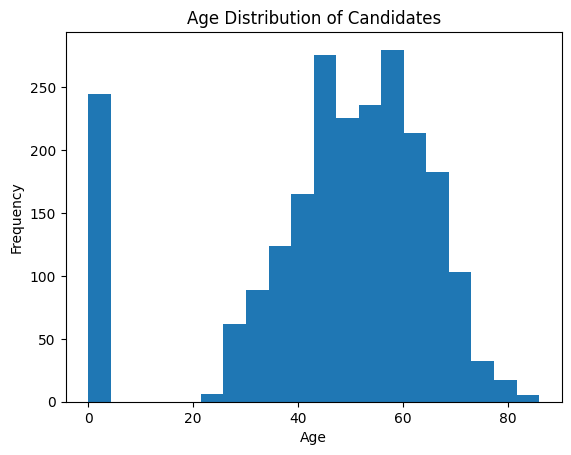

In [22]:
print("Plotting Data (e.g., Histogram of Age Distribution)")

vote['AGE'].plot(kind='hist', bins=20, title="Age Distribution of Candidates")
plt.xlabel('Age')
plt.show()

Create a Bar Chart for Categorical Data (e.g., Gender Distribution)


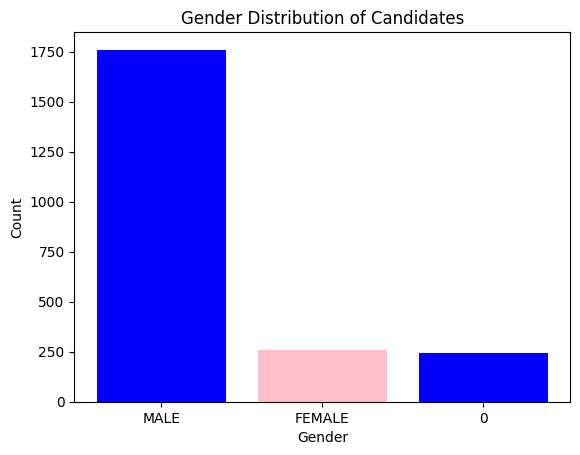

In [33]:
print("Create a Bar Chart for Categorical Data (e.g., Gender Distribution)")

gender_count = vote['GENDER'].value_counts()

# Convert the index to strings
plt.bar(gender_count.index.astype(str), gender_count.values, color=['blue', 'pink'])
plt.title('Gender Distribution of Candidates')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Plot a Pie Chart (e.g., Party Representation in the Election)


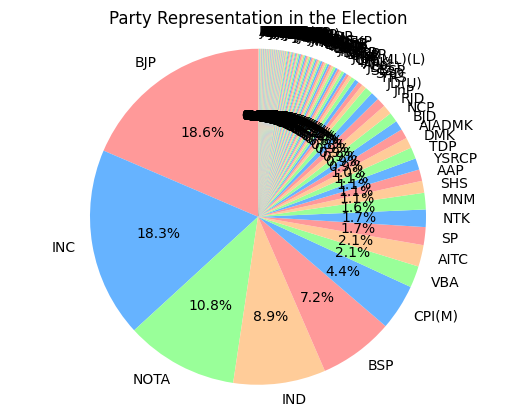

In [34]:
print("Plot a Pie Chart (e.g., Party Representation in the Election)")

party_count = vote['PARTY'].value_counts()

plt.pie(party_count, labels=party_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Party Representation in the Election')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

Box Plot for Distribution of a Variable (e.g., Distribution of Votes Across Parties)


<ipython-input-62-dd9e1492ce47>:3: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



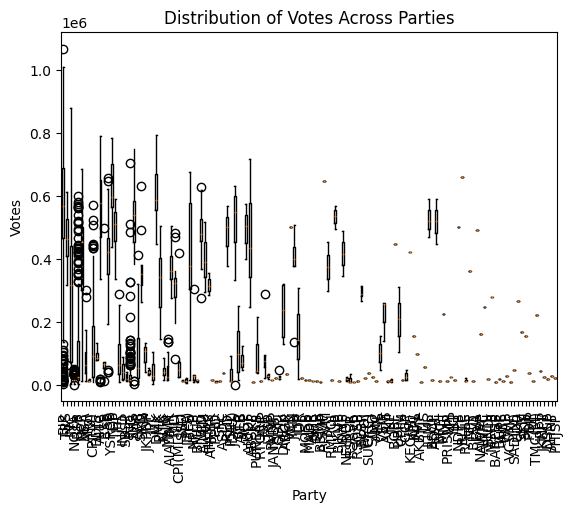

In [62]:
print("Box Plot for Distribution of a Variable (e.g., Distribution of Votes Across Parties)")

plt.boxplot([vote[vote['PARTY'] == party]['TOTAL\nVOTES'] for party in vote['PARTY'].unique()],
            labels=vote['PARTY'].unique())
plt.title('Distribution of Votes Across Parties')
plt.xlabel('Party')
plt.ylabel('Votes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

Stacked Bar Chart (e.g., Gender Distribution by Party)


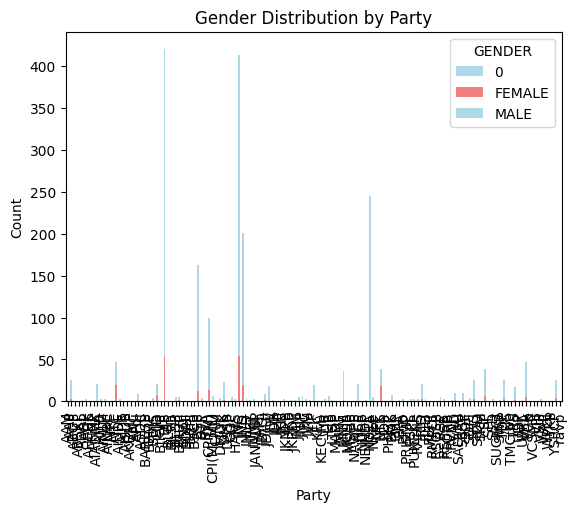

In [63]:
print("Stacked Bar Chart (e.g., Gender Distribution by Party)")

gender_party = pd.crosstab(vote['PARTY'], vote['GENDER'])
gender_party.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Gender Distribution by Party')
plt.xlabel('Party')
plt.ylabel('Count')
plt.show()


Pair Plot to Visualize Relationships Between Multiple Variables


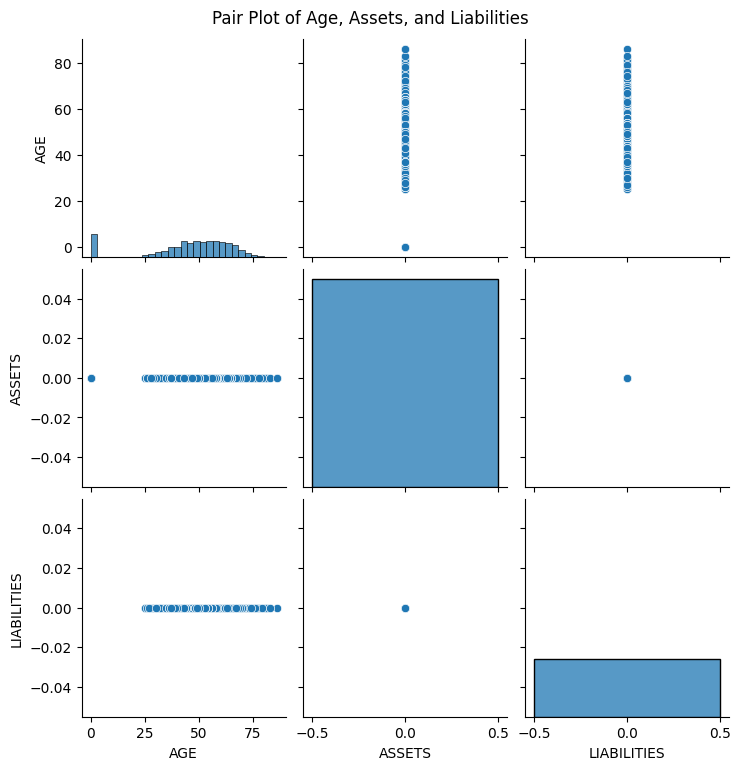

In [65]:
print("Pair Plot to Visualize Relationships Between Multiple Variables")

sns.pairplot(vote[['AGE', 'ASSETS', 'LIABILITIES']])
plt.suptitle('Pair Plot of Age, Assets, and Liabilities', y=1.02)
plt.show()

Create a Histogram with Multiple Subplots (e.g., Votes Distribution by Party)


<ipython-input-70-c2f6b94d7362>:12: UserWarning:

Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations



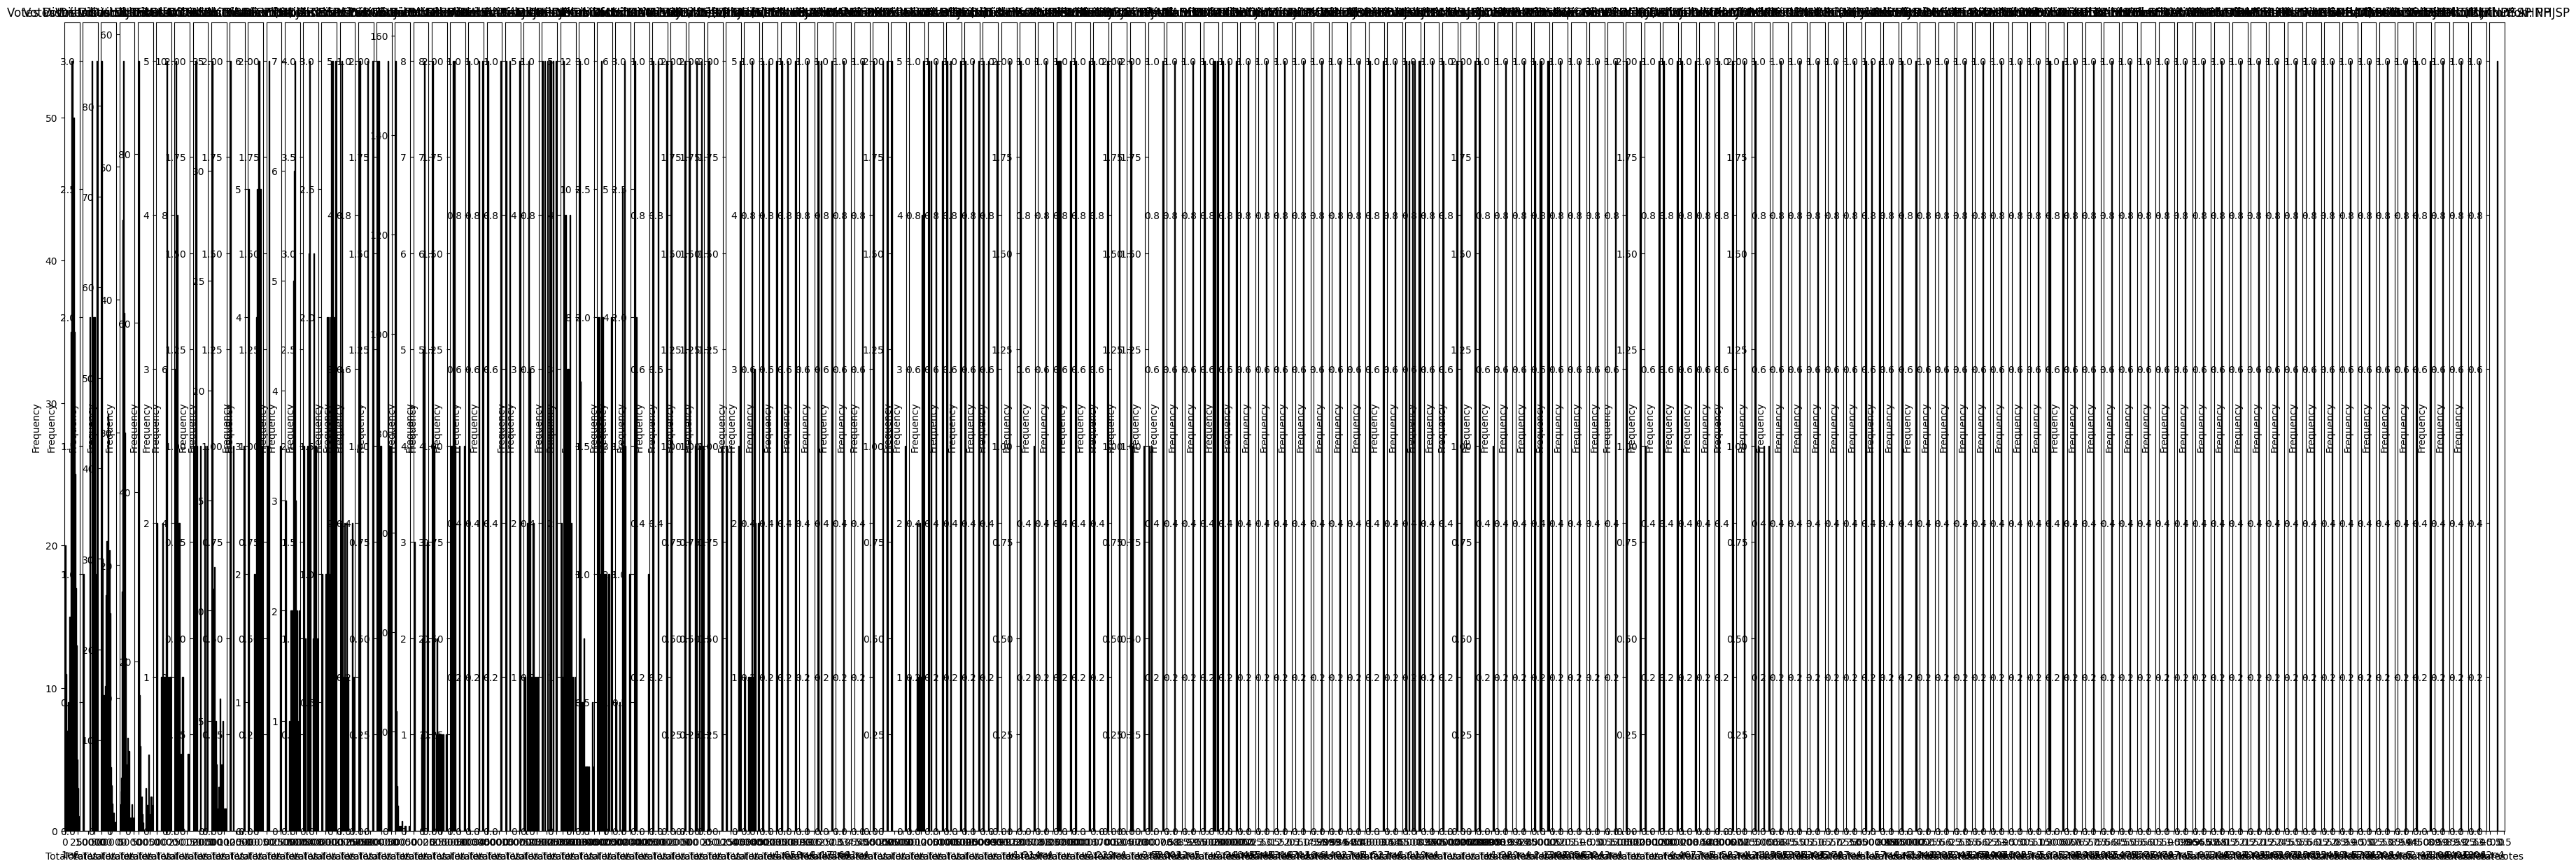

In [70]:
print("Create a Histogram with Multiple Subplots (e.g., Votes Distribution by Party)")

parties = vote['PARTY'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(parties), figsize=(45, 15))

for i, party in enumerate(parties):
    axes[i].hist(vote[vote['PARTY'] == party]['TOTAL\nVOTES'], bins=20, color='lightblue', edgecolor='black')
    axes[i].set_title(f'Votes Distribution: {party}')
    axes[i].set_xlabel('Total Votes')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Create a Radar Chart for Comparing Multiple Variables (e.g., Candidates by Age, Assets, and Votes)


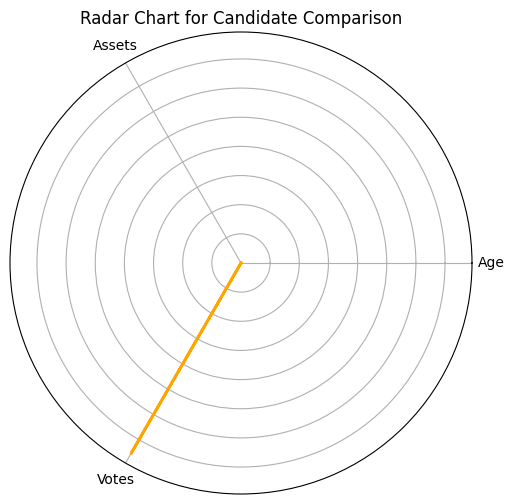

In [73]:
print("Create a Radar Chart for Comparing Multiple Variables (e.g., Candidates by Age, Assets, and Votes)")


# Instead of 'Candidate Name', use an actual candidate name from your data
example_candidate = vote['NAME'].iloc[0]  # Get the name of the first candidate
candidate_data = vote.loc[vote['NAME'] == example_candidate, ['AGE', 'ASSETS', 'TOTAL\nVOTES']].values.flatten()
categories = ['Age', 'Assets', 'Votes']
N = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Make the plot circular by appending the first value to the end
candidate_data = np.concatenate((candidate_data, [candidate_data[0]]))
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, candidate_data, color='orange', alpha=0.25)
ax.plot(angles, candidate_data, color='orange', linewidth=2)
ax.set_yticklabels([])  # Hide radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Radar Chart for Candidate Comparison')
plt.show()

Violin Plot for Distribution of Data (e.g., Age Distribution by Party)


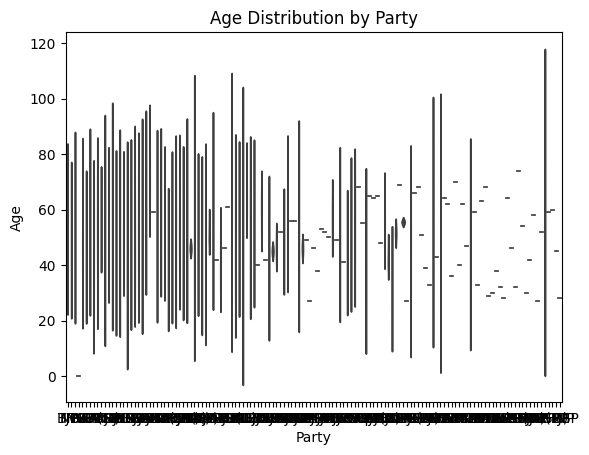

In [75]:
print("Violin Plot for Distribution of Data (e.g., Age Distribution by Party)")

sns.violinplot(x='PARTY', y='AGE', data=vote, inner="quart")
plt.title('Age Distribution by Party')
plt.xlabel('Party')
plt.ylabel('Age')
plt.show()

Heatmap of Correlations Between Numeric Variables (e.g., Correlation Between Votes, Assets, and Liabilities)


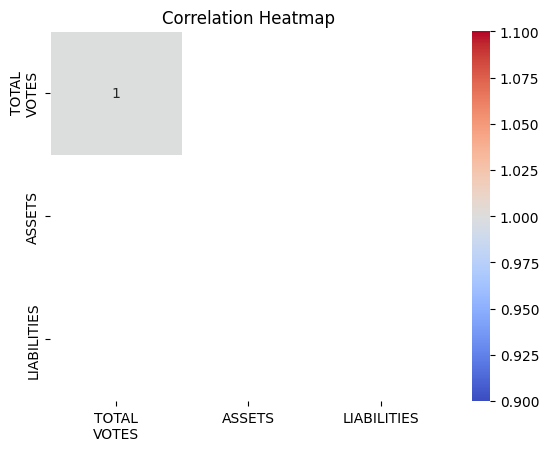

In [64]:
print("Heatmap of Correlations Between Numeric Variables (e.g., Correlation Between Votes, Assets, and Liabilities)")


correlation_matrix = vote[['TOTAL\nVOTES', 'ASSETS', 'LIABILITIES']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

3D Scatter Plot for Visualizing Relationships Between Three Variables


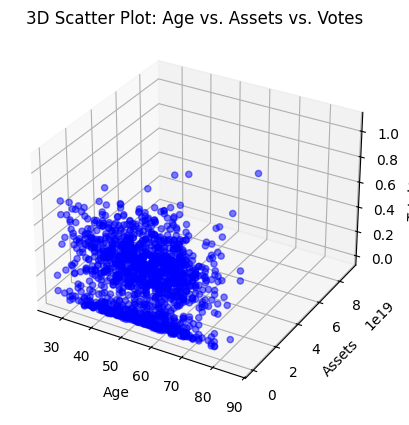

In [84]:
print("3D Scatter Plot for Visualizing Relationships Between Three Variables")

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Clean the 'ASSETS' and 'TOTAL\nVOTES' columns to extract numeric values
for col in ['ASSETS', 'TOTAL\nVOTES']:
    # Convert the column to string first if it's not already
    vote[col] = vote[col].astype(str)

    vote[col] = vote[col].str.replace('Rs', '', regex=False) \
                         .str.replace(',', '', regex=False) \
                         .str.replace('~', '', regex=False) \
                         .str.replace('+', '', regex=False) \
                         .str.replace(' ', '', regex=False) \
                         .str.replace('Lac', '00000', regex=False) \
                         .str.replace('Crore','0000000',regex=False) \
                         .str.replace('\n', '', regex=False)  # Remove newline characters
    # Convert the cleaned column to numeric
    vote[col] = pd.to_numeric(vote[col], errors='coerce')

ax.scatter(vote['AGE'], vote['ASSETS'], vote['TOTAL\nVOTES'], c='blue', alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Assets')
ax.set_zlabel('Total Votes')
ax.set_title('3D Scatter Plot: Age vs. Assets vs. Votes')

plt.show()

Create a Subplot Grid for Multiple Plots


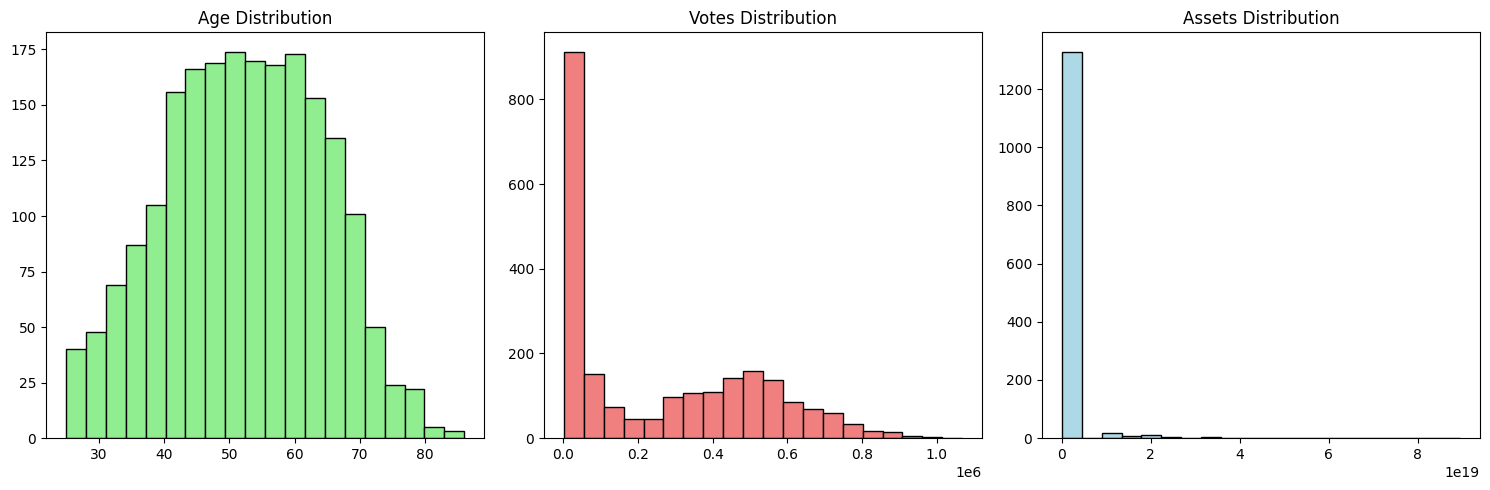

In [86]:
print("Create a Subplot Grid for Multiple Plots")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(vote['AGE'], bins=20, color='lightgreen', edgecolor='black')
axes[0].set_title('Age Distribution')

axes[1].hist(vote['TOTAL\nVOTES'], bins=20, color='lightcoral', edgecolor='black')
axes[1].set_title('Votes Distribution')

axes[2].hist(vote['ASSETS'], bins=20, color='lightblue', edgecolor='black')
axes[2].set_title('Assets Distribution')

plt.tight_layout()
plt.show()

#Seaborn

Plot a Histogram of a Single Variable (e.g., Age Distribution)


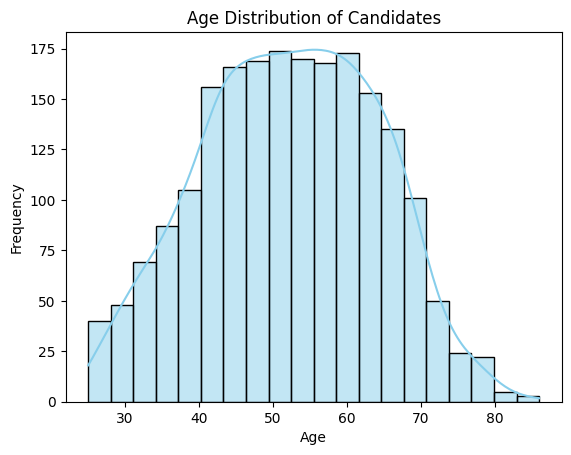

In [88]:
print("Plot a Histogram of a Single Variable (e.g., Age Distribution)")

sns.histplot(vote['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Candidates')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Create a Bar Plot for Categorical Data (e.g., Gender Distribution)


<ipython-input-89-67eef97b22e2>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




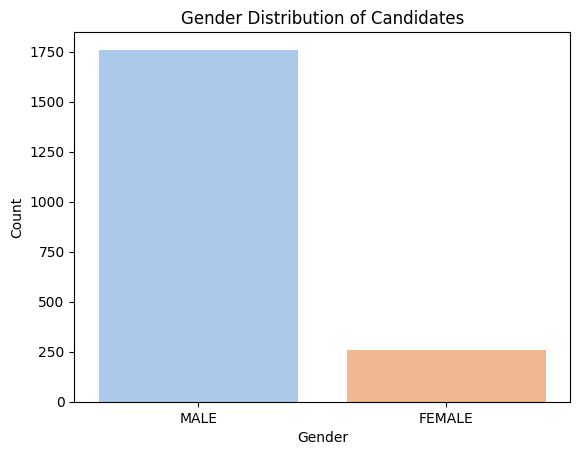

In [89]:
print("Create a Bar Plot for Categorical Data (e.g., Gender Distribution)")

sns.countplot(data=vote, x='GENDER', palette='pastel')
plt.title('Gender Distribution of Candidates')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Scatter Plot for Relationships Between Two Variables (e.g., Age vs. Assets)


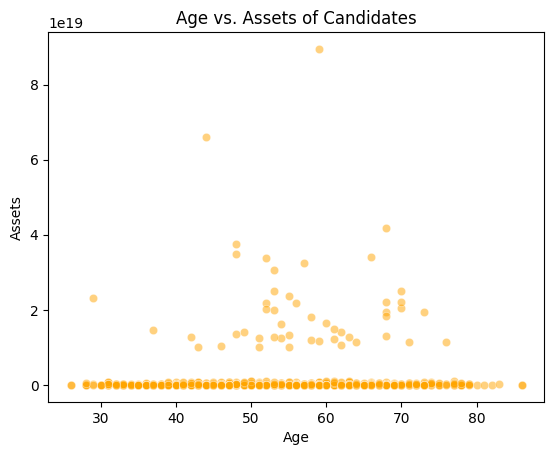

In [95]:
print("Scatter Plot for Relationships Between Two Variables (e.g., Age vs. Assets)")

sns.scatterplot(data=vote, x='AGE', y='ASSETS', color='orange', alpha=0.5)
plt.title('Age vs. Assets of Candidates')
plt.xlabel('Age')
plt.ylabel('Assets')
plt.show()

FacetGrid to Create Multiple Subplots (e.g., Gender vs. Age in Different Categories)


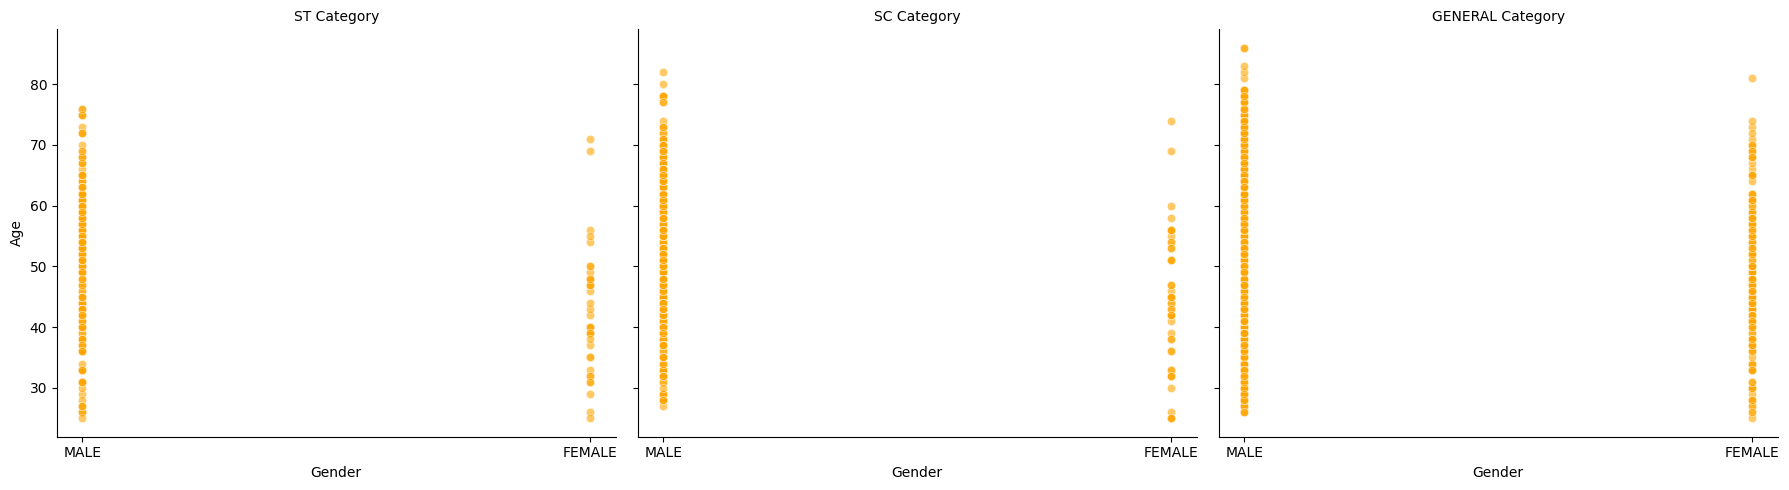

In [99]:
print("FacetGrid to Create Multiple Subplots (e.g., Gender vs. Age in Different Categories)")

g = sns.FacetGrid(vote, col='CATEGORY', height=5, aspect=1.2)
g.map(sns.scatterplot, 'GENDER', 'AGE', alpha=0.6, color='orange')
g.set_axis_labels('Gender', 'Age')
g.set_titles('{col_name} Category')
plt.show()

Bar Plot for Categorical Data with a Numeric Summary (e.g., Average Assets per Party)


<ipython-input-100-843916421da5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




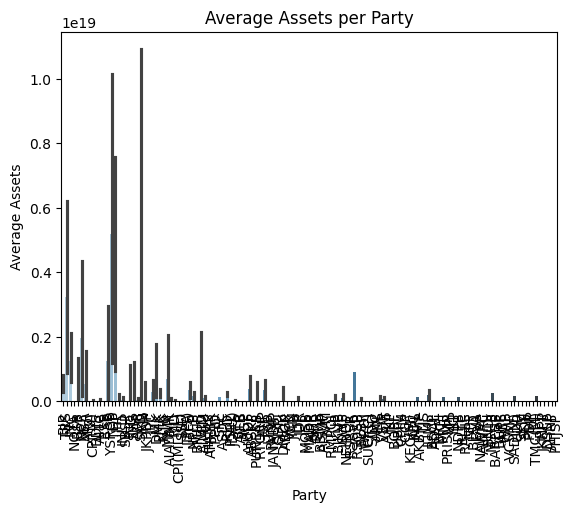

In [100]:
print("Bar Plot for Categorical Data with a Numeric Summary (e.g., Average Assets per Party)")

sns.barplot(data=vote, x='PARTY', y='ASSETS', palette='Blues_d')
plt.title('Average Assets per Party')
plt.xlabel('Party')
plt.ylabel('Average Assets')
plt.xticks(rotation=90)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')